# H-calls4famCluster

## Data Table

In [ ]:
# @title
import datetime
print(datetime.datetime.now())

2024-02-21 04:16:21.865830


Similar to the example we demonstrate in the class, here are some samples of malware call sequences.

Although you can know the dataset contains four malware families (as shown by the sub-directory), in this homework, you should pretend you have no idea what malware family a sample belongs to.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# get data from github

import requests

url = 'https://github.com/hsiaom26/DS4CS-24/raw/main/data/calls4fam_0522_tfds.tgz'

response = requests.get(url)

if response.status_code == 200:
    # Open the file for writing
    with open('calls4fam_0522_tfds.tgz', 'wb') as f:
        # Write the response content to the file
        f.write(response.content)
else:
    print('Error: Failed to download the file')

In [ ]:
!tar -zxvf calls4fam_0522_tfds.tgz

In [ ]:
!ls -al calls4fam_0522

total 56
drwxr-xr-x 6 root root  4096 Feb 21 04:06 .
drwxr-xr-x 1 root root  4096 Feb 21 04:08 ..
drwxr-xr-x 2 root root 12288 Feb 21 04:06 0
drwxr-xr-x 2 root root 12288 Feb 21 04:06 1
drwxr-xr-x 2 root root 12288 Feb 21 04:06 2
drwxr-xr-x 2 root root 12288 Feb 21 04:06 5


In [ ]:
def count_api_calls(malware_text_file):
  aip_dict = dict()
  with open(malware_text_file, 'r') as file:
    call_seq = file.readline() # note: only one line in .txt file
    calls = call_seq.split()
    for call in calls:
      if call in aip_dict:
        aip_dict[call] += 1
      else:
        aip_dict[call] = 1
    return aip_dict

In [ ]:
import os
# A dictionary to collect all count_api_calls() return
malware_call_dict = dict()

# Define the root directory to walk through
root_dir = "/content/calls4fam_0522/"

# Walk through the directory and its subdirectories
for dir_name, subdir_list, file_list in os.walk(root_dir):

    # Read all .txt files in the current directory
    for file_name in file_list:
        if file_name.endswith(".txt"):
            # Read the file contents
            subdir = dir_name.split('/')[-1]
            malware_call_dict[subdir+'/'+file_name] = count_api_calls(os.path.join(dir_name, file_name))

In [ ]:
import pandas as pd

# Convert the dictionary to a DataFrame
malware_call_df = pd.DataFrame.from_dict(malware_call_dict, orient='index')
malware_call_df.fillna(0, inplace=True)
malware_call_df

,socket,connect,getsockname,close,gettimeofday,getppid,times,brk,fcntl64,setsockopt,...,SIGSEGV,getrlimit,dup,statfs64,_llseek,fchown32,lstat64,fchown,sysinfo,fchmodat
2/626.txt,2.0,1.0,1.0,1.0,13.0,1.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/751.txt,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/866.txt,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/735.txt,1.0,1.0,1.0,2.0,2.0,1.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/850.txt,3.0,2.0,1.0,1.0,16.0,1.0,1.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/1020.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/1123.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/938.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/418.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
malware_binary_call_df = malware_call_df.applymap(lambda x: 1.0 if x > 0.0 else 0.0)
malware_binary_call_df

,socket,connect,getsockname,close,gettimeofday,getppid,times,brk,fcntl64,setsockopt,...,SIGSEGV,getrlimit,dup,statfs64,_llseek,fchown32,lstat64,fchown,sysinfo,fchmodat
2/626.txt,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/751.txt,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/866.txt,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/735.txt,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/850.txt,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/1020.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/1123.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/938.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/418.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Q1

Now, your turn. Try K-means in Q1. You may use either `malware_call_df` or `malware_binary_call_df`.


### Q1-1

Writre code to apply K-means, use `euclidean` to evaluate distance. Show the Elbow Plot with avgWithinSS.

In [ ]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

X = malware_binary_call_df.values


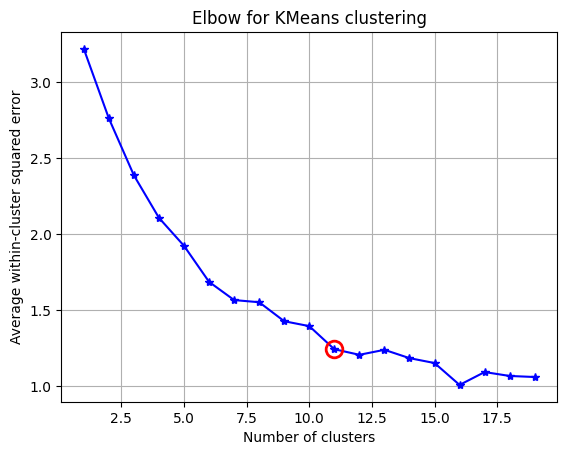

### Q1-2

How many clusters do you suggest by referencing the elbow plot? Why?

### Q1-3

Show how many samples are there in each cluster? Is there any cluster which has only a few samples?

In [ ]:
cen, _ = kmeans(X, k)
cen.shape

(10, 121)

In [ ]:
D = cdist(X, cen, 'euclidean')
cIdx = np.argmin(D, axis=1)
dist = np.min(D, axis=1)

1    286
4    209
7    138
2    123
6    108
0     99
8     88
5     68
9     46
3     43
dtype: int64

### Q1-4

`malware_call_df` is better or `malware_binary_call_df` is better to represent the data? (open question)


### Q1-5

what if we use some normalization or standardzation on `malware_call_df`? Would it be better to represent the data? (open question)

## Q2

Use UPGMA to visualized the data. You may sample the dataset for better visualization (lets say 10% sample in each class).

### Q2-1

Plot UPGMA using 10% data

In [ ]:
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt

from scipy.spatial.distance import squareform, pdist

In [ ]:
malware_binary_call_10_df = malware_binary_call_df.sample(frac=0.1)
malware_binary_call_10_df

,socket,connect,getsockname,close,gettimeofday,getppid,times,brk,fcntl64,setsockopt,...,SIGSEGV,getrlimit,dup,statfs64,_llseek,fchown32,lstat64,fchown,sysinfo,fchmodat
0/93.txt,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5/1109.txt,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/912.txt,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/430.txt,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/694.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/656.txt,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/1083.txt,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/867.txt,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/1151.txt,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


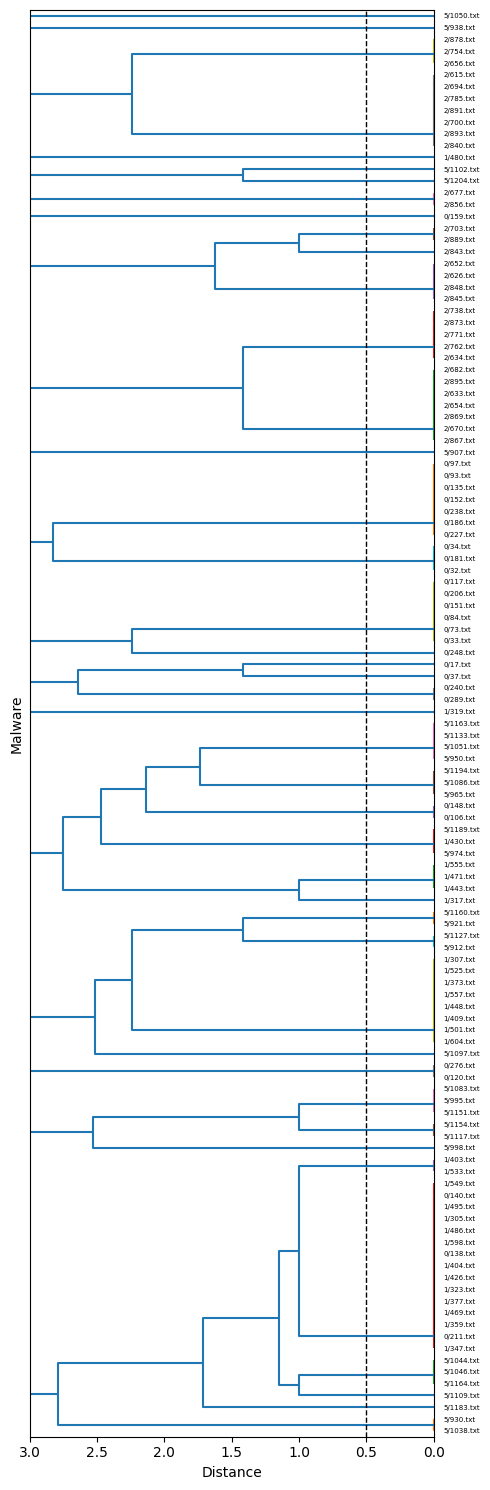

In [ ]:
# use binary features and euclidean distance
bd = pdist(malware_binary_call_10_df, metric='euclidean') # try jacc
upgma_threshold = 0.5
plt.figure(figsize=(5, 15))

Z = sch.linkage(bd, method='average')
P = sch.dendrogram(Z, labels=malware_binary_call_10_df.index,
                   color_threshold=upgma_threshold, orientation = 'left')
plt.axvline(x=upgma_threshold, linewidth=1, color='black', linestyle='--')

plt.xlabel('Distance')
plt.ylabel('Malware')
plt.xlim([3, 0])
plt.tight_layout()
plt.show()

### Q2-2
Try to use jaccard distance in UPGMA.

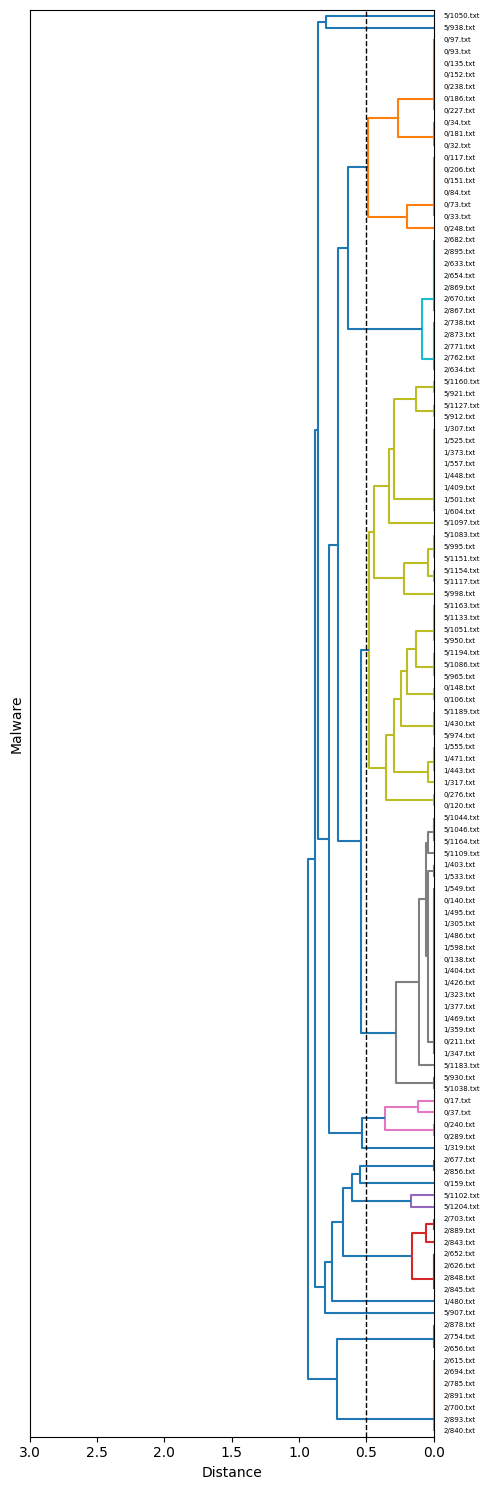

In [ ]:
# use binary features and jaccard distance

### Q2-2

Jaccard looks better. Why? (open question)

## Q3

### Q3-1

Try K-Means with k = 4, and compare the dbscan result with the actual class lable shown in the file name.


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
compare_df

,labels_true,cluster_label
0,2,2
1,2,1
2,2,1
3,2,0
4,2,3
...,...,...
1203,5,0
1204,5,0
1205,5,0
1206,1,0


### Q3-2

The cluster k=4 looks not good. How can you improve it?

### Q4

Now, you can output the `malware_call_df` as a csv file, and analyze it in Orange.

In [ ]:
output_df = malware_call_df.copy()
output_df['target'] = malware_call_df.index.str.split('/').str[0]
output_df.to_csv('malware_call_df.csv')

### Q4-1

What is the best classificaiton rate you can find? What algorithm is it? You do not need to post the Orange workflow in this ipynb. Post the result is good enough.

### Q4-2

Guess why the alogithim performs best? (open question)